In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('/Users/klsbelousov/ML/Datasets/Titanic/train.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['Age'].isna().sum()

177

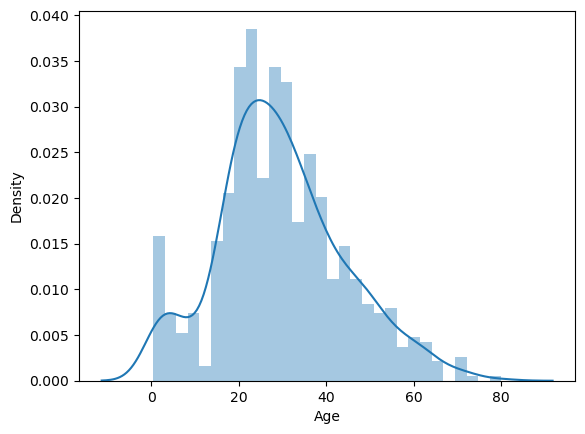

In [16]:
sns.distplot(df['Age'].dropna(), bins=30);

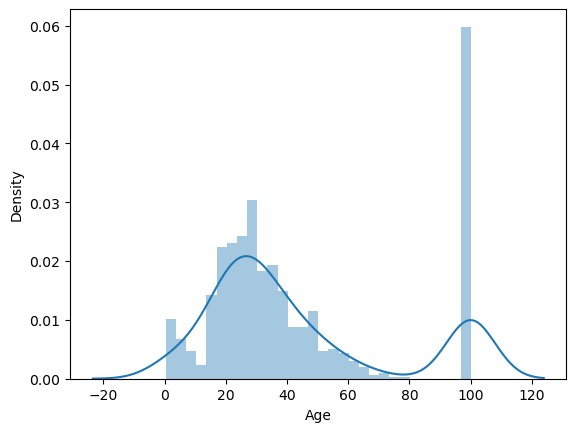

In [17]:
sns.distplot(df['Age'].fillna(100), bins=30);

### Gaussian Distribution

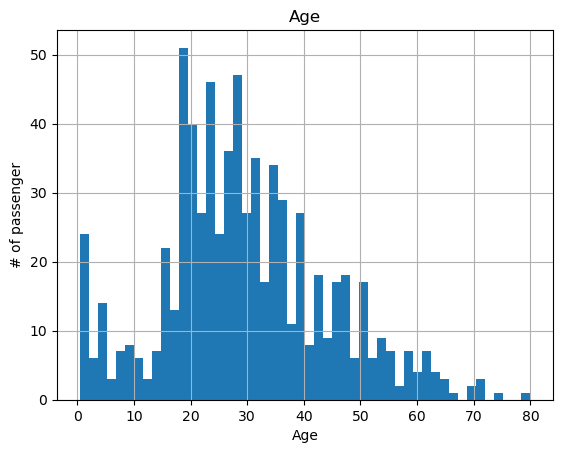

In [19]:
figure = df['Age'].hist(bins=50);
figure.set_title('Age');
figure.set_xlabel('Age');
figure.set_ylabel('# of passenger');

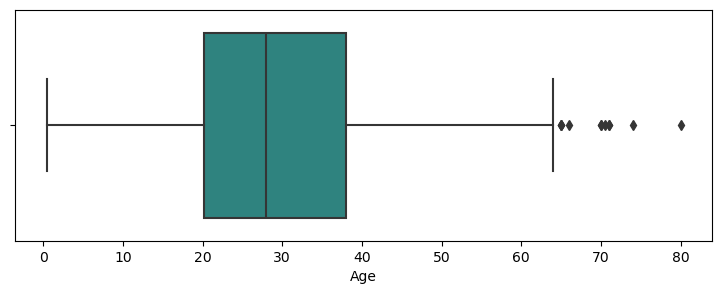

In [34]:
plt.figure(figsize=(9, 3));
sns.boxplot(df, x='Age', palette='viridis');
plt.xlabel('Age');
plt.show()

In [29]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
### Assuming Age follows Gaussian Distribution we will calculate the boundaries which differentiates the outliers

In [40]:
upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()

In [43]:
print(lower_boundary, upper_boundary, df['Age'].mean())

-13.88037434994331 73.27860964406095 29.69911764705882


In [44]:
### Lets compute interquantile range to calculate the boundaries

In [45]:
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

In [46]:
IQR

17.875

In [48]:
lower_bridge = df['Age'].quantile(0.25) - IQR * 1.5
upper_bridge = df['Age'].quantile(0.75) + IQR * 1.5

print(lower_bridge, upper_bridge)

-6.6875 64.8125


In [52]:
#extreme outliers

lower_bridge = df['Age'].quantile(0.25) - IQR * 3
upper_bridge = df['Age'].quantile(0.75) + IQR * 3

print(lower_bridge, upper_bridge)

-33.5 91.625


### Feature is skewed

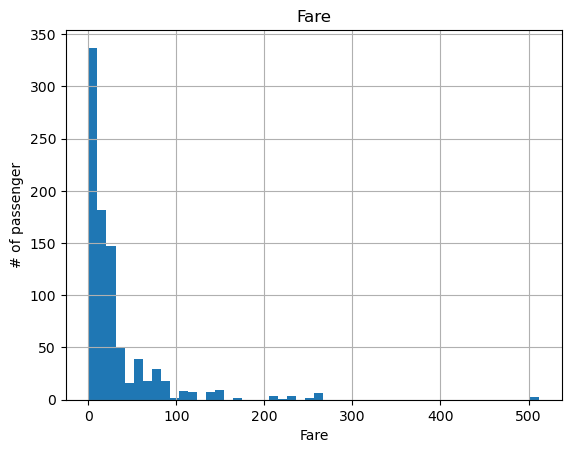

In [53]:
figure = df['Fare'].hist(bins=50);
figure.set_title('Fare');
figure.set_xlabel('Fare');
figure.set_ylabel('# of passenger');

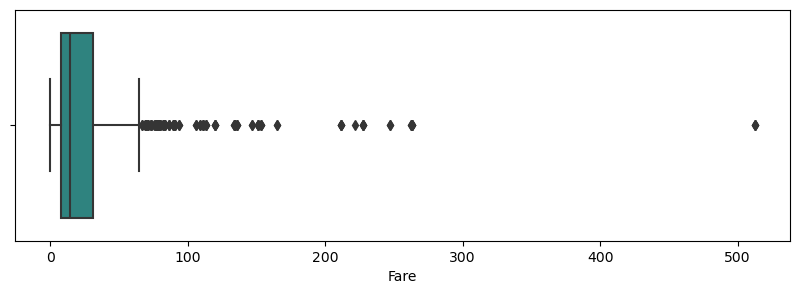

In [56]:
plt.figure(figsize=(10, 3));
sns.boxplot(df, x='Fare', palette='viridis');
plt.xlabel('Fare');
plt.show()

In [57]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [58]:
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)

In [59]:
lower_bridge = df['Fare'].quantile(0.25) - IQR * 1.5
upper_bridge = df['Fare'].quantile(0.75) + IQR * 1.5

print(lower_bridge, upper_bridge)

-26.724 65.6344


In [60]:
lower_bridge = df['Fare'].quantile(0.25) - IQR * 3
upper_bridge = df['Fare'].quantile(0.75) + IQR * 3

print(lower_bridge, upper_bridge)

-61.358399999999996 100.2688


In [61]:
data = df.copy()

In [62]:
data.loc[data['Age'] > 73, 'Age'] = 73 

In [64]:
data.loc[data['Fare'] > 100, 'Fare'] = 100